<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>

# Introduction
## Short summary
In this exercise you will:

* train multi-layer perceptrons (MLPs) for both binary and multiple classification problems and a regression problem, and perform model selection to optimize validation performance

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report".

**Deadline for submitting the report: See Canvas assignment.**

## The data
There are several datasets in this exercise.

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated using random numbers each time you run the cell. This means that each time you generate the data it will be slightly different. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There *regr2* dataset represents a more complex synthetic regression problem than *regr1* from exercise 1. It has 6 inputs (independent variables) and one target variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distributed with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29.
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The exercises
There are 10 questions in this exercise, in five different cells below.

For questions 1-6, code is available that you can run directly or only need to make small modifications to. The first 3 questions deal with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deal with training a regression network for the *regr2* dataset.

For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way). Question 7-8 deals with Japanese vowels classification problem; here your task is to come up with a model that optimizes the validation result. Question 9 is about the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells.

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Data | Needed | Defines the functions to generate the artificial datasets |
| 3 | PlotData | Information | Plots the 2D classification datasets |
| 4 | Confusion | Needed | Functions that plots the confusion matrix |
| 5 | MLP | Needed | Defines the MLP model |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries |
| 7 | Statistics | Needed | Functions that calculate and plot performance measures |
| 8 | Training | Needed | Functions for training and testing the MLP model |
| 9 | Ex1 | Exercise | For question 1-3 (syn2) |
| 10 | Ex2 | Exercise | For question 4-6 (regr2) |
| 11 | Ex3 | Exercise | For question 7-8 (vowels) |
| 12 | Ex4 | Exercise | For question 9 (bcf) |
| 13 | Ex5 | Exercise | For question 10 (twospirals) |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a short introduction to the content and purpose of the exercise.
* Answers to questions: For each of the questions provide an answer. It can be short answers or longer ones depending on the nature of the questions, but try to be efficient in your writing. (Don't include lots of program output or plots that aren't central to answering the question.)
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question!

## Last but not least
Have fun!

---

# CellName: Init (#1)
**CellType: Needed**  
**Cell instruction: Initializing the libraries**

In the cell below, we import all the libraries that are needed for this exercises.

Run the cell by entering into the cell and press "CTRL Enter".

In [1]:
import torch
device = 'cpu'
# Uncomment this to use CUDA acceleration if available
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"PyTorch: Using {device} device")
# The floating point data type can be changed here
dtype_torch = torch.float32

from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from collections import OrderedDict
!pip install torchmetrics
import torchmetrics


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

from sklearn.metrics import confusion_matrix, log_loss, classification_report
from sklearn.model_selection import train_test_split

PyTorch: Using cpu device
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 17.1 MB/s eta 0:00:00


# CellName: Data (#2)
**CellType: Needed**  
**Cell instruction: Defining synthetic data sets**

This cell defines the different synthetic data sets. It also provides functions for reading the Vowels dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data.

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def syn2(N):
    "Generate data for classification problem in 2D."
    x = np.empty(shape=(N, 2))
    d = np.empty(shape=(N, 1))
    N1 = N // 2

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(size=(N1, 2))
    # Negative samples
    x[N1:,:] = -.8 + np.random.normal(size=(N-N1, 2))

    # Target
    d[:N1] = 1
    d[N1:] = 0

    return x, d

def regr2(N, v=0):
    "Generate more complicated regression data."
    x = np.empty(shape=(N, 6))

    uni = lambda n : np.random.uniform(0, 1, n)
    norm = lambda n : np.random.normal(0, 1, n)
    noise = lambda n : np.random.normal(0, 1, n)

    x[:, :4] = norm((N, 4))
    x[:, 4:] = uni((N, 2))

    d = (2*x[:, 0] + x[:, 1]*x[:, 2]**2 + np.exp(x[:, 3]) +
         5*x[:, 4]*x[:, 5] + 3*np.sin(2*np.pi*x[:, 5]))
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)

    return x, d[:, None]

def twospirals(n_points, turns = 3, noise = 0.5):
    "Generate the two spirals dataset."
    n = (np.random.rand(n_points, 1) * 0.95 + 0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points)))[:, None])

def vowels():
    "Load and prepare the Japanese vowels dataset."
    def pre_proc(file_name):
        block = []
        x = []

        with open(file_name) as file:
            for line in file:
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
        x = [torch.Tensor(ar) for ar in x]
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    # Labels
    chunk1 = list(range(30, 270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person] * block.shape[0])

    chunk2 = [31, 35, 88, 44, 29, 24, 40, 50, 29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person] * block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    # Make 1-hot arrays
    num_classes = 9
    classes = np.eye(num_classes, dtype=np.float32)
    d_trn = classes[d_trn]
    d_tst = classes[d_tst]

    # Split into train, test and validation
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)
    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():
    "Load and prepare the Bioconcentration dataset."
    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:, 3:12].values
    x_tst = bcf_tst.iloc[:, 3:12].values

    # One-hot coding
    d_trn = bcf_trn.iloc[:, 12].values.astype(int) - 1
    d_trn = np.eye(3, dtype=int)[d_trn]
    d_tst = bcf_tst.iloc[:,12].values.astype(int) - 1
    d_tst = np.eye(3, dtype=int)[d_tst]

    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    "Mean and stddev across samples"
    return np.mean(x, axis=0), np.std(x, axis=0)

# CellName: PlotData (#3)
**CellType: Information**  
**Cell instruction: Plotting the data**

Here we just generate 100 cases for syn2 and the spiral dataset and plot them.

Run the cell by entering into the cell and press "CTRL Enter".

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

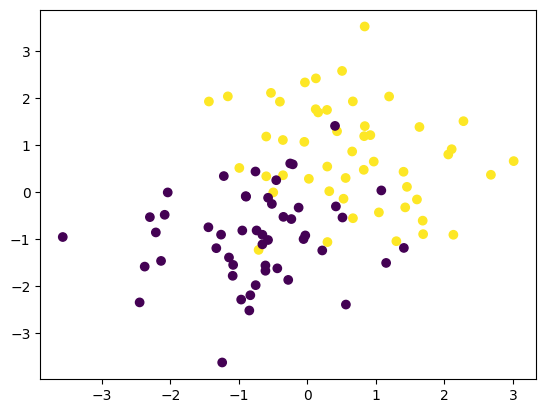

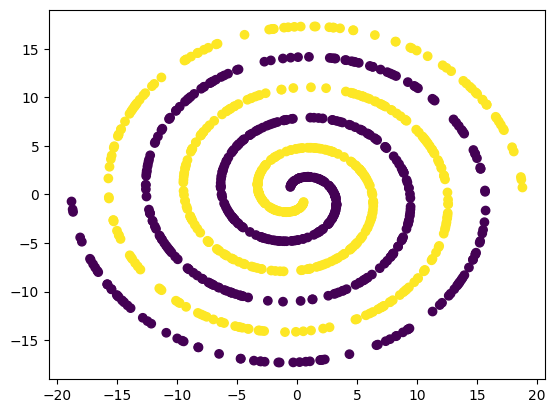

In [3]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=d)

# CellName: Confusion (#4)
**CellType: Needed**  
**Cell Instruction: Plot the confusion matrix**

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called by the user. See example of usage in the exercises.

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix',
                          cmap=None, normalize=True):
    "Plot a confusion matrix"

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n'
               f'accuracy={accuracy:0.4f}; misclass={misclass:0.4f}')
    plt.show()

def make_cm_plot(model, inp, trg, label='Test data'):
    """
    Compute and plot the confusion matrix
    """
    print(f'*** Result for {label} ***')

    num_classes = trg.shape[1]
    y = model.predict(inp)

    print(f'log_loss:   {log_loss(trg, y):.4f}')
    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    acc = (y_class==d_class).mean()
    print(f'accuracy:   {acc:.4f}\n')

    class_names = [f'class {i+1}' for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst,
                          normalize    = False,
                          target_names = class_names,
                          title        = f"Confusion Matrix, {label}")

# CellName: MLP (#5)
**CellType: Needed**  
**Cell instruction: Defining the MLP model**

This cell defines the MLP model. Several MLP hyperparameters are needed to define a model.
Here is a list of them: **Note:** They can all be specified when you call
this function in later cells. The ones specified in this cell are the default values.

* inputs: the input dimension (integer)

* output: the input dimension (integer)

* layers: size of the network, eg `[5]` for a one hidden layer with 5 nodes and `[5, 3]` for a two layer network with 5 and 3 hidden nodes each.

* activation: the activation function. Most common are
    * `None` (linear)
    * `nn.ReLU`
    * `nn.Tanh`
    * `nn.Sigmoid`
        
* output_activation: the activation function for the output nodes. Most common are
    * `None` (linear)
    * `nn.Sigmoid`
    * `nn.Softmax`

* dropout: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, specify them as a list. Example, for a two hidden layer network `dropout = [0.5, 0.75]` means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* l2regularization: L2 regularization strength. Like with the dropout, you can specify a single value or a list of values for the hidden layers.

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
class Network(nn.Module):
    "A simple MLP with one or more fully connected layers"
    def __init__(self, *, inputs=1, outputs=1, nodes=[4], activation=nn.Tanh,
                 out_activation=None, dropout=None, l2regularization=None):
        """
        Args:
            inputs (int, optional): The number of input nodes.
            outputs (int, optional): The number of output nodes.
            nodes (list, optional): A list of layer sizes.
            activation (list or class): Activation function (or None for linear).
                Defaults to nn.Tanh. Can be a list of length len(nodes).
            out_activation (optional): Activation function for output layer.
            dropout (float or array-like, optional): Dropout fraction for hidden layers.
            l2regularization (float or array-like, optional): Regularization strength for hidden layers.
        """
        super().__init__()

        # Accept a value or array-like of length len(nodes)
        if dropout is not None:
            dropout = np.broadcast_to(dropout, len(nodes))
        if activation is not None:
            activation = np.broadcast_to(activation, len(nodes))
        if l2regularization is not None:
            l2regularization = np.broadcast_to(l2regularization, len(nodes))
            self.l2regularization = []
        else:
            self.l2regularization = None

        seqstack = OrderedDict()
        prevn = inputs
        for i, n in enumerate(nodes):
            layer = nn.Linear(prevn, n, dtype=dtype_torch)
            seqstack[f"layer{i+1}"] = layer
            prevn = n
            if activation is not None:
                seqstack[f"act{i+1}"] = activation[i]()
            if dropout is not None and dropout[i]:
                seqstack[f"drop{i+1}"] = nn.Dropout(dropout[i])
            if l2regularization is not None and l2regularization[i]:
                self.l2regularization.append((l2regularization[i], layer))

        seqstack["layerN"] = nn.Linear(prevn, outputs, dtype=dtype_torch)
        if out_activation is not None:
            # Softmax needs the input dimension to be specified
            if out_activation is nn.Softmax:
                seqstack["actN"] = out_activation(dim=1)
            else:
                seqstack["actN"] = out_activation()
        self.mlp_stack = nn.Sequential(seqstack)

    def forward(self, x):
        "Apply the network stack on some input"
        return self.mlp_stack(x)

    def regularization_loss(self):
        "Compute the total regularization cost"
        if self.l2regularization is None:
            return 0
        loss = 0
        for lambd, layer in self.l2regularization:
            loss = loss + lambd * torch.norm(layer.weight, p=2)
        return loss

    def predict(self, input_data):
        """
        Apply the network on a set of input data.

        Args:
            input_data (np.ndarray or Tensor): Input data

        Returns:
            pred (np.ndarray or Tensor): Predicted output.
        """
        self.eval()
        if isinstance(input_data, np.ndarray):
            inp = torch.tensor(input_data, dtype=dtype_torch, device=device)
            with torch.no_grad():
                pred = self(inp)
            return pred.cpu().detach().numpy()
        with torch.no_grad():
            return self(input_data.to(device))

    def __str__(self):
        s = super().__str__()
        ps = ["Named parameters:"] + [
            f"{name}: {param.numel()}" for name, param in
             self.mlp_stack.named_parameters() if param.requires_grad]
        totp = sum(p.numel() for p in self.mlp_stack.parameters() if p.requires_grad)
        return s + f"\nTrainable parameters: {totp}\n" + "\n  ".join(ps) + "\n"

# CellName: Boundary (#6)
**CellType: Needed**  
**Cell Instruction: Decision boundary**

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier.

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def decision_boundary(X : np.ndarray, Y1 : np.ndarray, model):
    """
        Plot classfication and decision boundary for binary classification problem

        Args:
            X (np.ndarray): input
            Y1 (np.ndarray): target
            model (Network): the model

        Returns:
            None.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    Z[Z > .5] = 1
    Z[Z <= .5] = 0

    Y_pr = model.predict(X).flatten()
    Y = Y1.flatten()

    Y_pr[Y_pr > .5] = 1
    Y_pr[Y_pr <= .5] = 0
    Y[(Y != Y_pr) & (Y == 0)] = 2
    Y[(Y != Y_pr) & (Y == 1)] = 3

    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='+', c='k')
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', c='k')

    plt.scatter(X[Y == 3, 0], X[Y == 3, 1], marker = '+', c='r')
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], marker = 'o', c='r')

    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()

# CellName: Statistics (#7)
**CellType: Needed**  
**Cell instruction: Present result for both classification and regression problems**

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures.

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def stats_classification(model : Network, dset : TensorDataset,
                         *, label : str, loss_fn = None):
    """
    Print classification statistics.

    Args:
        model (Network): The model.
        dset (TensorDataset): Input and target data.
        label (str): Training, test etc.
        loss (optional): Loss function.

    Returns:
        None.
    """
    pred = model.predict(dset.tensors[0])
    targ = dset.tensors[1]
    if loss_fn is not None:
        loss = loss_fn(pred, targ)

    if targ.shape[1] == 1:
        # Binary
        pred = pred >= .5
        targ = targ >= .5
        nof_p, tp, tn = [k.sum() for k in [targ, pred[targ], ~pred[~targ]]]
        stats = {'Accuracy': (tp + tn) / len(targ),
                 'Sensitivity': tp / nof_p,
                 'Specificity': tn / (len(targ) - nof_p)}
    else:
        # One-hot
        pred = pred.argmax(axis=1)
        targ = targ.argmax(axis=1)
        stats = {'Accuracy': (pred == targ).sum() / len(targ)}

    if loss_fn is not None:
        stats['Loss'] = loss

    print(f"*** STATISTICS for {label} Data ***")
    for l, v in stats.items():
        print(f'{l:15} {v:.4f}')
    print()

def stats_regression(*, model : Network, dset : TensorDataset, label = 'Training'):
    """
    Print regression statistics.
        MSE = mean squeared error between target and predictions.
        CorrCoeff = correlation coefficient for the scatter between predictions and target values.

    Args:
        model (Network): The model.
        dset (TensorDataset): Input and target data.
        label (str): Training, test etc.

    Returns:
        None.
    """
    pred = model.predict(dset.tensors[0]).flatten()
    targ = dset.tensors[1].flatten()

    stats = {
        'MSE' : ((targ - pred)**2).mean(),
        'CorrCoeff': torch.corrcoef(torch.vstack((pred, targ)))[1,0] }

    print('\n', '#'*10, f'STATISTICS for {label} Data', '#'*10, '\n')
    for l, v in stats.items():
        print(f'{l:15} {v:.4f}')
    print('\n', '#'*50)

# CellName: Training (#8)
**CellType: Needed**  
**Cell Instruction: Functions for training and testing the MLP model**

This cell defines functions for training the model for a single epoch (`train_epoch`),
evaluating the performance in the test data (`test`) and training and testing over
many epochs (`train_loop`).

The `train_loop` function takes a previously defined `MLPNetwork` model, two
PyTorch `DataLoader`s that provide the data for training and test, and several
hyperparameters:

* loss_fn: The error function used during training. There are three common ones
    * `nn.MSELoss` (mean squared error)
    * `nn.BCELoss` (binary cross entropy)
    * `nn.CrossEntropyLoss` (categorical cross entropy)

* optimizer: The error minimization method, which is constructed with information about the model and a learning rate. Common choices are
    * `torch.optim.SGD`
    * `torch.optim.Adam`
    * `torch.optim.Nadam`
    * `torch.optim.RMSprop`

* metrics: Additional metrics to compute and print besides the loss. We use the [torchmetrics package](https://lightning.ai/docs/torchmetrics/stable/) and pass the metric(s) as a dict with `{name: metric}`. Examples:
    * `{'accuracy': torchmetrics.Accuracy(task='binary')}`
    * `{'MSE': torchmetrics.MeanSquaredError()}`

Run the cell by entering into the cell and press "CTRL Enter".

In [8]:
def train_epoch(*, model : Network, dataloader : DataLoader,
                loss_fn, optimizer : torch.optim.Optimizer):
    """
    Train a model for a single epoch.

    Args:
        model (Network): The network.
        dataloader (DataLoader): Batch DataLoader with training data.
        loss_fn (Loss): Loss function, e.g. nn.MSELoss.
        optimizer (Optimizer): The optimizer used to update the network.

    Returns:
        train_loss (float): Training error over all batches.
    """
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)   # Move data to GPU if necessary
        optimizer.zero_grad()   # Reset the gradients

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item() * len(X)
        loss = loss + model.regularization_loss()

        # Backpropagation
        loss.backward()
        optimizer.step()
    return train_loss / len(dataloader.dataset)

def test(*, model : Network, dataloader : DataLoader, loss_fn, metrics=[]):
    """
    Test a model on a set of data.

    Args:
        model (Network): The network.
        dataloader (DataLoader): DataLoader with data to test.
        loss_fn (Loss): Loss function, e.g. nn.MSELoss.
        metrics (iterable): Additional metrics from torchmetrics.

    Returns:
        loss (float): Mean error over all batches.
    """
    model.eval()
    loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss += loss_fn(pred, y).item() * len(X)
            for m in metrics:
                m.update(pred, y)
    return loss / len(dataloader.dataset)


def train_loop(*, model : Network, train_dataloader : DataLoader,
               val_dataloader : DataLoader = None, loss_fn,
               optimizer : torch.optim.Optimizer, epochs : int,
               print_every:int = 100, metrics=None, print_final=True):
    """
    Train and optionally test a model.

    Args:
        model (Network): The network.
        train_dataloader (DataLoader): Training data.
        val_dataloader (DataLoader, optional): Validation data.
        loss_fn (Loss): Loss function, e.g. nn.MSELoss.
        optimizer (Optimizer): An optimizer from torch.optim.
        epochs (int): Number of epochs to train for.
        print_every (int, optional): Print loss every so many epochs. Defaults to 100.
        metrics (dict(name: metric), optional): Record/print these additional metrics.
        print_final(bool, optional): Print final metrics. Defaults to True.

    Returns:
        train_losses (list(float)): Training loss during each epoch.
        val_losses (list(float)): Validation loss after each epoch.
        metrics_res (dict(name: list(float))): Values of metrics after each epoch.
    """
    train_losses = []
    val_losses = []
    val_loss = np.nan

    # Move metrics to CPU/GPU and prepare for their output
    metrics = {name: m.to(device) for name, m in (metrics or {}).items()}
    metrics_res = {name: [] for name in metrics.keys()}

    for t in range(epochs):
        train_loss = train_epoch(model=model, dataloader=train_dataloader,
                           loss_fn=loss_fn, optimizer=optimizer)
        train_losses.append(train_loss)
        if val_dataloader is not None:
            for m in metrics.values():
                m.reset()
            val_loss = test(dataloader=val_dataloader, model=model,
                            loss_fn=loss_fn, metrics=metrics.values())
            val_losses.append(val_loss)
            for name, m in metrics.items():
                metrics_res[name].append(m.compute().cpu())
        if (print_every > 0 and t % print_every == 0) or (
                print_every >= 0 and t + 1 == epochs):
            extras = [f" {n} {v[-1]:<7f}" if torch.isreal(v[-1])
                      else f" {n} {v[-1]}"
                      for n, v in metrics_res.items()]
            print(f"Epoch {t+1:<7d} train {train_loss:<7f} "
                  f" validation {val_loss:<7f}", "".join(extras))
    if print_final:
        print("\n** Validation metrics after training **\n"
              f"Loss {val_losses[-1]:<7g}")
        for n, v in metrics_res.items():
            if torch.isreal(v[-1]):
                print(f"{n} {v[-1]:<7g}")
            else:
                print(f"{n}:")
                print(v[-1])
        print()
    return train_losses, val_losses, metrics_res

def plot_training(train_loss, val_loss, metrics_res={}):
    "Plot the training history"
    plt.figure()
    plt.ylabel('Loss / Metric')
    plt.xlabel('Epoch')
    plt.plot(train_loss, label="Training loss")
    plt.plot(val_loss, label="Validation loss")
    for name, res in metrics_res.items():
        if torch.isreal(res[0]):
            plt.plot(res, label=name)
    plt.legend(loc='best')
    plt.show()

---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

# CellName: Ex1 (#9)
**CellType: Exercise**  
**Cell instruction: Instruction for questions 1-3**

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyperparameters etc.

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance? For classification problems we will provide 4 different measurements as printed by the *stats_classification* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* Loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

## Question 1, single-node validation performance
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points.

Now, use *syn2* (100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?**

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember from the first computer exercise that you should average over a few trained models.

## Question 2, improving training performance
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding a good local minimum of the loss function, which may require some tuning of the hyperparameters that control the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is used in the cells below as the default minimizer.

## Question 3, optimizing validation performance
However, we are almost always interested in optimal *validation* performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained.**


## Question 1, single-node validation performance
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points.

Now, use *syn2* (100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?**

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember from the first computer exercise that you should average over a few trained models.



Performance is very similar between runs. Accuracy varies around 87-88%

Network(
  (mlp_stack): Sequential(
    (layer1): Linear(in_features=2, out_features=1, bias=True)
    (act1): Tanh()
    (layerN): Linear(in_features=1, out_features=1, bias=True)
    (actN): Sigmoid()
  )
)
Trainable parameters: 5
Named parameters:
  layer1.weight: 2
  layer1.bias: 1
  layerN.weight: 1
  layerN.bias: 1

Epoch 1       train 0.797468  validation 0.738686  accuracy 0.500000
Epoch 101     train 0.334563  validation 0.333010  accuracy 0.857000
Epoch 201     train 0.333608  validation 0.311620  accuracy 0.866000
Epoch 301     train 0.332671  validation 0.300655  accuracy 0.869000
Epoch 401     train 0.332077  validation 0.296861  accuracy 0.871000
Epoch 500     train 0.331731  validation 0.295303  accuracy 0.872000

** Validation metrics after training **
Loss 0.295303
accuracy 0.872  



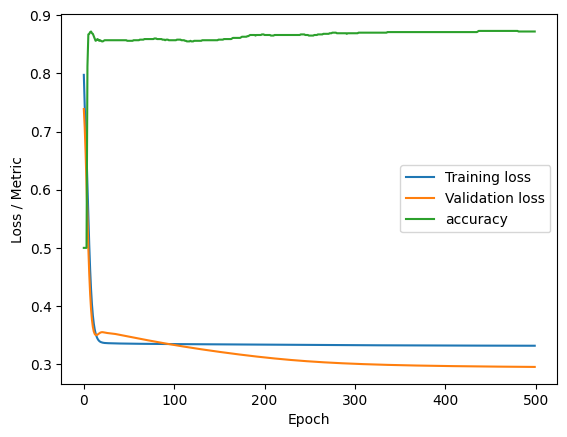

*** STATISTICS for Training Data ***
Accuracy        0.8400
Sensitivity     0.8600
Specificity     0.8200
Loss            0.3280

*** STATISTICS for Validation Data ***
Accuracy        0.8720
Sensitivity     0.9040
Specificity     0.8400
Loss            0.2953



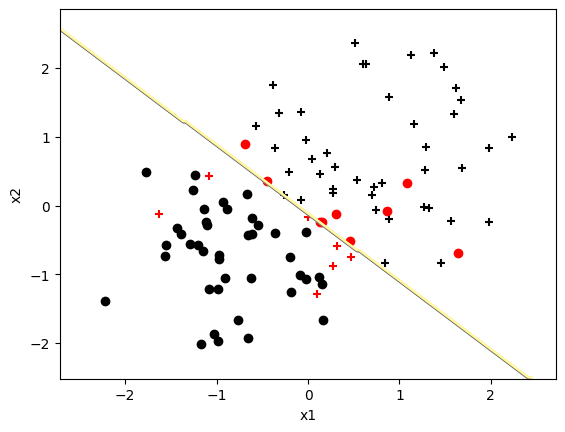

CPU times: user 21.4 s, sys: 87.5 ms, total: 21.5 s
Wall time: 29.9 s


In [9]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu) / std
x_val = (x_val - mu) / std

# Define the network, cost function and training settings
model_ex1 = Network(
    inputs = x_trn.shape[1],        # number of input nodes
    outputs = 1,                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
    nodes = [1],                    # number of nodes in hidden layer
    activation = nn.Tanh,           # activation function in hidden layer
    out_activation = nn.Sigmoid,    # activation function in output layer (if not linear)
    ).to(device)                    # move data to GPU or keep with CPU

# Optimization parameters
opt_method = torch.optim.Adam   # minimization method
learning_rate = 0.05            # learning rate
loss_fn = nn.BCELoss()          # loss function, binary cross entropy
number_epochs = 500
minibatch_size = 25

# Additional metrics to print {name: metric}
metrics = {'accuracy': torchmetrics.Accuracy("binary")}

# Print a summary of the model
print(model_ex1)

# Set up the optimizer
optimizer = opt_method(model_ex1.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and test data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

dset_val = TensorDataset(torch.tensor(x_val, device=device, dtype=dtype_torch),
                         torch.tensor(d_val, device=device, dtype=dtype_torch))
dl_val = DataLoader(dset_val, batch_size=minibatch_size)

# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex1,
    train_dataloader=dl_trn,
    val_dataloader=dl_val,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    print_every=100,
    epochs=number_epochs)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Call the stats function to print out statistics for classification problems
stats_classification(model_ex1, dset_trn, loss_fn=loss_fn, label="Training")
stats_classification(model_ex1, dset_val, loss_fn=loss_fn, label="Validation")

# Plot the decision boundary with respect to the training data
decision_boundary(x_trn, d_trn, model_ex1)

# Uncomment this to plot the decision boundary with respect to the validation data
#decision_boundary(x_val, d_val, model_ex1)

## Question 2, improving training performance
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?**

[32,16,8]
could also be [32,16]


**(b) What is the performance on the validation data set?**
Accuracy is around 81-87%

**Hint:** Remember from the first computer exercise that overtraining often means finding a good local minimum of the loss function, which may require some tuning of the hyperparameters that control the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is used in the cells below as the default minimizer.

Network(
  (mlp_stack): Sequential(
    (layer1): Linear(in_features=2, out_features=16, bias=True)
    (act1): Tanh()
    (layer2): Linear(in_features=16, out_features=8, bias=True)
    (act2): Tanh()
    (layerN): Linear(in_features=8, out_features=1, bias=True)
    (actN): Sigmoid()
  )
)
Trainable parameters: 193
Named parameters:
  layer1.weight: 32
  layer1.bias: 16
  layer2.weight: 128
  layer2.bias: 8
  layerN.weight: 8
  layerN.bias: 1

Epoch 1       train 0.795746  validation 0.794126  accuracy 0.154000
Epoch 101     train 0.439478  validation 0.410023  accuracy 0.875000
Epoch 201     train 0.343350  validation 0.309271  accuracy 0.878000
Epoch 301     train 0.326961  validation 0.300522  accuracy 0.873000
Epoch 401     train 0.316403  validation 0.299687  accuracy 0.874000
Epoch 500     train 0.307990  validation 0.301424  accuracy 0.873000

** Validation metrics after training **
Loss 0.301424
accuracy 0.873  



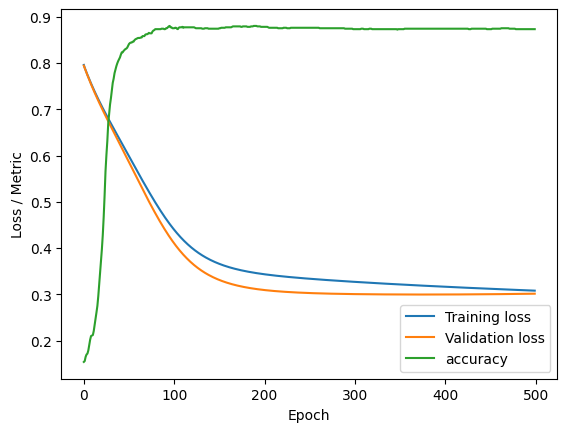

*** STATISTICS for Training Data ***
Accuracy        0.8600
Sensitivity     0.8200
Specificity     0.9000
Loss            0.3079

*** STATISTICS for Validation Data ***
Accuracy        0.8730
Sensitivity     0.8760
Specificity     0.8700
Loss            0.3014



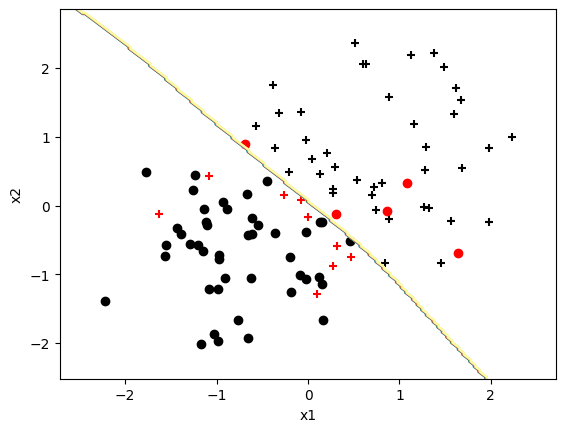

CPU times: user 10 s, sys: 20.4 ms, total: 10.1 s
Wall time: 10.1 s


In [10]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu) / std
x_val = (x_val - mu) / std

# Define the network, cost function and training settings
model_ex1 = Network(
    inputs = x_trn.shape[1],        # number of input nodes
    outputs = 1,                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
    nodes = [16,8],                    # number of nodes in hidden layer
    activation = nn.Tanh,           # activation function in hidden layer
    out_activation = nn.Sigmoid,    # activation function in output layer (if not linear)
    ).to(device)                    # move data to GPU or keep with CPU

# Optimization parameters
opt_method = torch.optim.Adam   # minimization method
learning_rate = 0.001            # learning rate
loss_fn = nn.BCELoss()          # loss function, binary cross entropy
number_epochs = 500
minibatch_size = 64

# Additional metrics to print {name: metric}
metrics = {'accuracy': torchmetrics.Accuracy("binary")}

# Print a summary of the model
print(model_ex1)

# Set up the optimizer
optimizer = opt_method(model_ex1.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and test data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

dset_val = TensorDataset(torch.tensor(x_val, device=device, dtype=dtype_torch),
                         torch.tensor(d_val, device=device, dtype=dtype_torch))
dl_val = DataLoader(dset_val, batch_size=minibatch_size)

# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex1,
    train_dataloader=dl_trn,
    val_dataloader=dl_val,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    print_every=100,
    epochs=number_epochs)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Call the stats function to print out statistics for classification problems
stats_classification(model_ex1, dset_trn, loss_fn=loss_fn, label="Training")
stats_classification(model_ex1, dset_val, loss_fn=loss_fn, label="Validation")

# Plot the decision boundary with respect to the training data
decision_boundary(x_trn, d_trn, model_ex1)

# Uncomment this to plot the decision boundary with respect to the validation data
#decision_boundary(x_val, d_val, model_ex1)

## Question 3, optimizing validation performance
However, we are almost always interested in optimal *validation* performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?**

accuracy 0.875000

**(b) Try to give an explanation for the number you obtained.**

# CellName: Ex2 (#10)
**CellType: Exercise**  
**Cell instruction: Instruction for questions 4-6**

Now we are going to look at a regression problem. The data as described above (*regr2*) consists of 6 inputs (features) and one output (target) value. As in the previous exercise, a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error means good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as a template for all questions regarding this regression problem.

## Question 4, optimizing regression performance
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes gives the best validation performance?** **What is the best validation MSE (or correlation coefficient) you get?**

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result.

## Question 5, improving generalization with L2 regularization
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find the optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**

**Hint:** When you test different values for a hyperparameter, it usually makes more sense to multiply with a constant factor than to add a constant term. For example, if you test five values in the range from 0.1 to 10, the values {0.1, 0.3, 1, 3, 10} are usually a better choice than {0.1, 2.5, 5, 7.5, 10}.

## Question 6, improving generalization with dropout
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?**

**Hint:** Using dropout may require even more hidden nodes to start with!

## Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and do not influence any grading.**

Repeat Q4-Q6 using two hidden layers.


Network(
  (mlp_stack): Sequential(
    (layer1): Linear(in_features=6, out_features=1, bias=True)
    (act1): Tanh()
    (layerN): Linear(in_features=1, out_features=1, bias=True)
  )
)
Trainable parameters: 9
Named parameters:
  layer1.weight: 6
  layer1.bias: 1
  layerN.weight: 1
  layerN.bias: 1

Epoch 1       train 1.044901  validation 1.277165 
Epoch 101     train 0.415737  validation 0.571611 
Epoch 201     train 0.413565  validation 0.564931 
Epoch 301     train 0.412997  validation 0.562950 
Epoch 401     train 0.412755  validation 0.562044 
Epoch 500     train 0.412633  validation 0.561543 

** Validation metrics after training **
Loss 0.561543



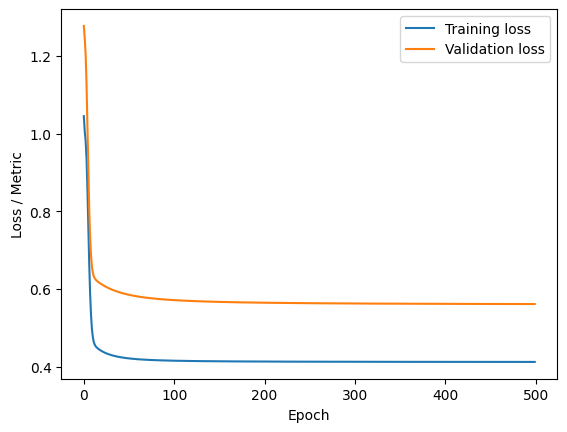

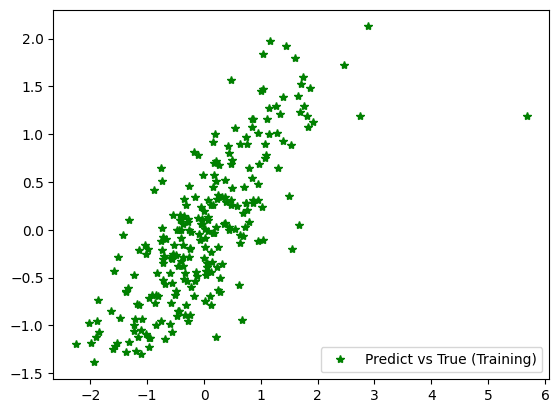

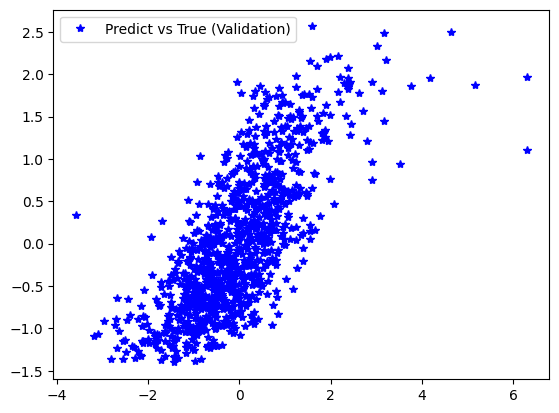


 ########## STATISTICS for Training Data ########## 

MSE             0.4082
CorrCoeff       0.7693

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5615
CorrCoeff       0.7431

 ##################################################
CPU times: user 15.4 s, sys: 35.8 ms, total: 15.5 s
Wall time: 18.2 s


In [14]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 11
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu) / std
x_val = (x_val - mu) / std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and training settings
model_ex2 = Network(
    inputs = x_trn.shape[1],    # number of input nodes
    outputs = 1,                # number of output nodes
    nodes = [1],                # number of nodes in hidden layer
    activation = nn.Tanh,       # activation function in hidden layer
    out_activation = None,      # linear activation function in output layer
    dropout = 0.0,                # dropout rate
    l2regularization = 0.0       # L2 regularization lambda
    ).to(device)                # move data to GPU or keep with CPU

# Optimization parameters
opt_method = torch.optim.Adam   # minimization method
learning_rate = 0.01           # learning rate
loss_fn = nn.MSELoss()          # loss function, MSE
number_epochs = 500
minibatch_size = 25

# Additional metrics to print
metrics = {}

# Print a summary of the model
print(model_ex2)

# Set up the optimizer
optimizer = opt_method(model_ex2.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and test data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

dset_val = TensorDataset(torch.tensor(x_val, device=device, dtype=dtype_torch),
                         torch.tensor(d_val, device=device, dtype=dtype_torch))
dl_val = DataLoader(dset_val, batch_size=minibatch_size)

# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex2,
    train_dataloader=dl_trn,
    val_dataloader=dl_val,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    print_every=100,
    epochs=number_epochs)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Scatter plots of predicted and true values
pred_trn = model_ex2.predict(x_trn)
pred_val = model_ex2.predict(x_val)

plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()

# Call the stat_reg to get MSE and correlation coefficient
stats_regression(model=model_ex2, dset=dset_trn, label='Training')
stats_regression(model=model_ex2, dset=dset_val, label='Validation')

## Question 4, optimizing regression performance
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes gives the best validation performance?** **What is the best validation MSE (or correlation coefficient) you get?**

8 hidden nodes seem to have the best balance between validation performance and overtraining.

Best metrics:
########## STATISTICS for Training Data ##########

MSE             0.1287
CorrCoeff       0.9335

 ##################################################

 ########## STATISTICS for Validation Data ##########

MSE             0.2854
CorrCoeff       0.8788

Network(
  (mlp_stack): Sequential(
    (layer1): Linear(in_features=6, out_features=8, bias=True)
    (act1): Tanh()
    (layerN): Linear(in_features=8, out_features=1, bias=True)
  )
)
Trainable parameters: 65
Named parameters:
  layer1.weight: 48
  layer1.bias: 8
  layerN.weight: 8
  layerN.bias: 1

Epoch 1       train 0.874423  validation 0.904385 
Epoch 101     train 0.215406  validation 0.531803 
Epoch 201     train 0.186357  validation 0.471714 
Epoch 301     train 0.163463  validation 0.388122 
Epoch 401     train 0.140089  validation 0.293283 
Epoch 500     train 0.133208  validation 0.285424 

** Validation metrics after training **
Loss 0.285424



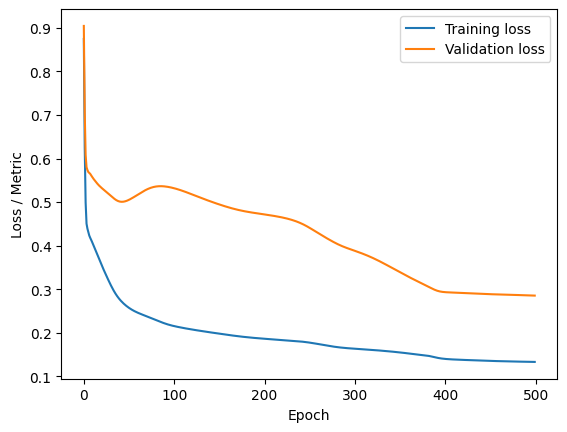

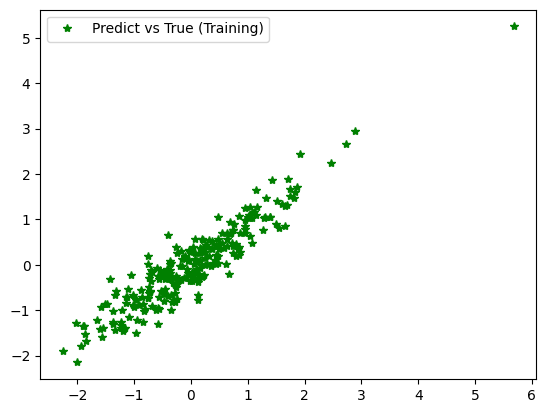

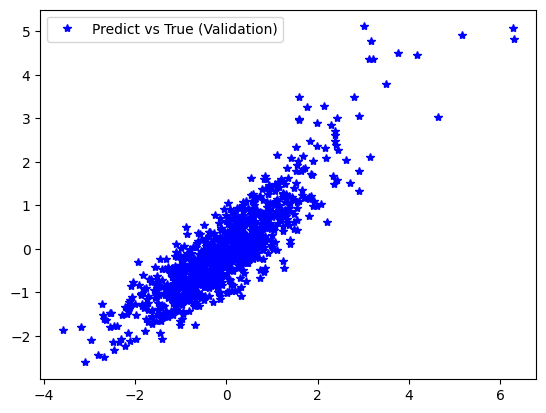


 ########## STATISTICS for Training Data ########## 

MSE             0.1287
CorrCoeff       0.9335

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.2854
CorrCoeff       0.8788

 ##################################################
CPU times: user 15.4 s, sys: 22 ms, total: 15.4 s
Wall time: 15.8 s


In [22]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 11
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu) / std
x_val = (x_val - mu) / std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and training settings
model_ex2 = Network(
    inputs = x_trn.shape[1],    # number of input nodes
    outputs = 1,                # number of output nodes
    nodes = [8],                # number of nodes in hidden layer
    activation = nn.Tanh,       # activation function in hidden layer
    out_activation = None,      # linear activation function in output layer
    dropout = 0.0,                # dropout rate
    l2regularization = 0.0       # L2 regularization lambda
    ).to(device)                # move data to GPU or keep with CPU

# Optimization parameters
opt_method = torch.optim.Adam   # minimization method
learning_rate = 0.01           # learning rate
loss_fn = nn.MSELoss()          # loss function, MSE
number_epochs = 500
minibatch_size = 25

# Additional metrics to print
metrics = {}

# Print a summary of the model
print(model_ex2)

# Set up the optimizer
optimizer = opt_method(model_ex2.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and test data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

dset_val = TensorDataset(torch.tensor(x_val, device=device, dtype=dtype_torch),
                         torch.tensor(d_val, device=device, dtype=dtype_torch))
dl_val = DataLoader(dset_val, batch_size=minibatch_size)

# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex2,
    train_dataloader=dl_trn,
    val_dataloader=dl_val,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    print_every=100,
    epochs=number_epochs)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Scatter plots of predicted and true values
pred_trn = model_ex2.predict(x_trn)
pred_val = model_ex2.predict(x_val)

plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()

# Call the stat_reg to get MSE and correlation coefficient
stats_regression(model=model_ex2, dset=dset_trn, label='Training')
stats_regression(model=model_ex2, dset=dset_val, label='Validation')


MSE             0.3457
CorrCoeff       0.8511

## Question 5, improving generalization with L2 regularization
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find the optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**

**Hint:** When you test different values for a hyperparameter, it usually makes more sense to multiply with a constant factor than to add a constant term. For example, if you test five values in the range from 0.1 to 10, the values {0.1, 0.3, 1, 3, 10} are usually a better choice than {0.1, 2.5, 5, 7.5, 10}.

# CellName: Ex3 (#11)
**CellType: Exercise**  
**Cell instruction: Instruction for questions 7-8**

For this exercise you are given a classification problem with fixed training, validation and test datasets. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here: normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

## Question 7, create MLP for binary classification
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.**  
**(b) Present your code.**

**Hint 1:**
Remember to normalize the input data.

**Hint 2:**
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

**Hint 3:**
Place a line with three tildes (\~\~\~) or backticks(´´´) above and below your code in the report:
~~~
    for a in ['Hello', 'World']:
        print(a)
~~~

## Question 8, model selection criteria
The typical goal is to have a high validation accuracy (i.e. the fraction of correctly classified cases). However, during training we typically monitor the *loss* of the validation data, to detect overtraining. Looking at both accuracy and loss, you may often find that the validation loss increases during training, but the validation accuracy stays constant. **Why can this happen?** **Given this situation, what would be your criteria to select the best model?**


In [ ]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP

# Define the model and optimization parameters
model_ex3 = Network( ... )

...

# Additional metrics to print
metrics = {}

# Print a summary of the model
print(model_ex3)

# Set up the optimizer
optimizer = opt_method(model_ex3.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and validation data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

dset_val = TensorDataset(torch.tensor(x_val, device=device, dtype=dtype_torch),
                         torch.tensor(d_val, device=device, dtype=dtype_torch))
dl_val = DataLoader(dset_val, batch_size=minibatch_size)


# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex3,
    train_dataloader=dl_trn,
    val_dataloader=dl_val,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    print_every=20,
    epochs=number_epochs)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Plot the confusion matrix
make_cm_plot(model_ex3, x_trn, d_trn, 'Training data')
make_cm_plot(model_ex3, x_val, d_val, 'Validation data')
make_cm_plot(model_ex3, x_tst, d_tst, 'Test data')

# CellName: Ex4 (#12)
**CellType: Exercise**  
**Cell instruction: Instruction for question 9**

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentration dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

## Question 9, create MLP for multi-class problem
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:**
Remember to normalize input (but not output) data.

**Hint 2:**
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:**
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_activation*) and a specific loss/error function (*loss_fn*).


In [ ]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()

# YOUR CODE HERE



# CellName: Ex5 (#13)
**CellType: Exercise**  
**Cell instruction: Instruction for question 10**

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with a model that is *as small as possible* in terms of the number of trainable parameters. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and we suggest using at least 1000 data points to get "good" spirals.

## Question 10, minimize network size
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

In [ ]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and training settings
model_ex5 = Network(
    inputs = x_trn.shape[1],        # number of input nodes
    outputs = 1,                    # number of output nodes
    nodes = [5],                    # number of nodes in hidden layer
    activation = nn.Tanh,           # activation function in hidden layer
    out_activation = nn.Sigmoid,    # activation function in output layer (if not linear)
    dropout = 0,                    # dropout rate
    l2regularization = 0            # L2 regularization lambda
    ).to(device)                    # move data to GPU or keep with CPU

# Optimization parameters
opt_method = torch.optim.Adam   # minimization method
learning_rate = 0.01            # learning rate
loss_fn = nn.BCELoss()          # loss function, binary cross entropy
number_epochs = 1500
minibatch_size = 100

# Additional metrics to print {name: metric}
metrics = {'accuracy': torchmetrics.Accuracy("binary")}

# Print a summary of the model
print(model_ex5)

# Set up the optimizer
optimizer = opt_method(model_ex5.parameters(), lr=learning_rate)

# Create datasets and batch loaders for the training and test data on the GPU or CPU
dset_trn = TensorDataset(torch.tensor(x_trn, device=device, dtype=dtype_torch),
                         torch.tensor(d_trn, device=device, dtype=dtype_torch))
dl_trn = DataLoader(dset_trn, batch_size=minibatch_size)

# Train the network and print the progress
train_loss, val_loss, metrics_res = train_loop(
    model=model_ex5,
    train_dataloader=dl_trn,
    val_dataloader=dl_trn,
    loss_fn=loss_fn,
    metrics=metrics,
    optimizer=optimizer,
    epochs=number_epochs,
    print_every=100)

# Plot the training history
plot_training(train_loss, val_loss, metrics_res)

# Call the stats function to print out statistics for classification problems
stats_classification(model_ex5, dset_trn, loss_fn=loss_fn, label="Training")

# Plot the decision boundary with respect to the validation data
decision_boundary(x_trn, d_trn, model_ex5)

# The report!
We have added intructions inside this report template. As you write your report, remove the instructions.

## Name

## Introduction
A few sentences about the overall theme of the exercise.

## Answers to questions
Provide enough information to clarify the meaning of your answers, so that they can be understood by someone who does not scroll up and read the entire instruction.

The questions are repeated here, for clarity of what is demanded. If it does not fit your style to quote them verbatim, change the format.

**Question 1**, single-node validation performance  
What is the performance you get on the validation dataset?

**Question 2**, improving training performance  
**(a)** How many hidden nodes do you need to reach an accuracy >95% on your training dataset?  
**(b)** What is the performance on the validation data set?

**Question 3**, optimizing validation performance  
**(a)** What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?  
**(b)** Try to give an explanation for the number you obtained.

**Question 4**, optimizing regression performance  
**(a)** How many hidden nodes gives the best validation performance?  
**(b)** What is the best validation MSE (or correlation coefficient) you get?

**Question 5**, improving generalization with regularization  
**(a)** Present your optimal model (L2 value and number of hidden nodes) and the validation performance.  
**(b)** Do you obtain a better result compared to Q4?

**Question 6**, improving generalization with dropout  
**(a)** Present your optimal model (dropout value and number of hidden nodes) and the validation performance.  
**(b)** Do you obtain a better result compared to Q4/Q5?

**Question 7**, create MLP to solve the vowel problem  
**(a)** Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.  
**(b)** Present your code.

**Question 8**, model selection criteria  
Why can the validation loss increase while the training loss stays constant?  
Given this situation, what would be your criteria to select the best model?

**Question 9**, create MLP for multi-class problem  
**(a)** Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.  
**(b)** What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?

**Question 10**, minimize network size  
Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.

## Summary
Connect the summary to your introduction, to provide a brief overview of your findings.
